<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Acronimo_y_nombre_uc3m.png" width=50%/>

<h1><font color='#12007a'>Procesamiento de Lenguaje Natural con Aprendizaje Profundo</font></h1>
<p>Autora: Isabel Segura Bedmar</p>

<img align='right' src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" width=15%/>
</center>      

# Problema: Clasificación por tipo de atracción RestMex.

El objetivo de este problema es entrenar y evaluar un modelo para la clasificación de reviews de tripadvisor, utilizando algoritmos clásicos de aprendizaje automático, tales como Support Vector Machine.

El dataset a utilizar es la colección de textos proporcionada por los organizadores de la tareas RestMex 2025.
**NOTA PARA PODER EJECUTAR ESTE NOTEBOOK**:

1) Para poder ejercutar correctamente este notebook, deberás abrirlo en tu Google Drive (por ejemplo, en la carpeta 'Colab Notebooks').

2) Además, debes guardar el dataset en tu Google Drive, dentro de carpeta 'Colab Notebooks/data/exist2021/'.



## Cargar el dataset

Lo primero que debes hacer es cargar el dataset. El fichero del dataset está almacenado dentro de la carpeta 'Rest-Mex_IberLEF' en Gooogle Drive.



Hacer el SVM y ver hasta dónde puede llegar, con el máximo de datos de training. Grabar al final el modelo. Subir al hugging face.

In [ ]:
from google.colab import drive
# monta tu unidad de google drive
drive.mount('/content/drive')

# cambiamos el directorio de trabajo a la carpeta donde está almacenado el dataset
import os
os.chdir('/content/drive/My Drive/Rest-Mex_IberLEF/')

Mounted at /content/drive


Cargamos los conjuntos de datos de training y evaluación en dos objetos dataframes de pandas:

In [ ]:
import pandas as pd

df = pd.read_csv("Rest-Mex_2025_train.csv",  sep=',', on_bad_lines='skip')
print('tamaño del dataset:', df.shape)

#show the first rows
df.head()

tamaño del dataset: (208051, 6)


,Title,Review,Polarity,Town,Region,Type
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel
3,un buen panorama cerca de CancÃºn,"Estando en CancÃºn, fuimos al puerto y tomamos...",4.0,Isla_Mujeres,QuintanaRoo,Attractive
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,5.0,Patzcuaro,Michoacan,Hotel


In [ ]:
from sklearn.model_selection import train_test_split

# Drop rows with missing values
df.dropna(inplace=True)
# Merge title and review
df['text'] = df['Title'].fillna('') + ". " + df['Review'].fillna('')

# Encode labels
label_map = {'Hotel': 0, 'Restaurant': 1, 'Attractive': 2}
df['label'] = df['Type'].map(label_map)

df.head()

# Development dataset
df_big, df_dev = train_test_split(df, test_size=0.01, stratify=df['label'], random_state=42)

# Stratified Split (70/15/15)
train_df, temp_df = train_test_split(df_dev, test_size=0.30, stratify=df_dev['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

print(f"Train size: {len(train_df)} | Val size: {len(val_df)} | Test size: {len(test_df)}")

Train size: 1456 | Val size: 312 | Test size: 313


In [ ]:
df['Review'][0]

'Excelente lugar para comer y pasar una buena noche!!!\nEl servicio es de primera y la comida exquisita!!!'

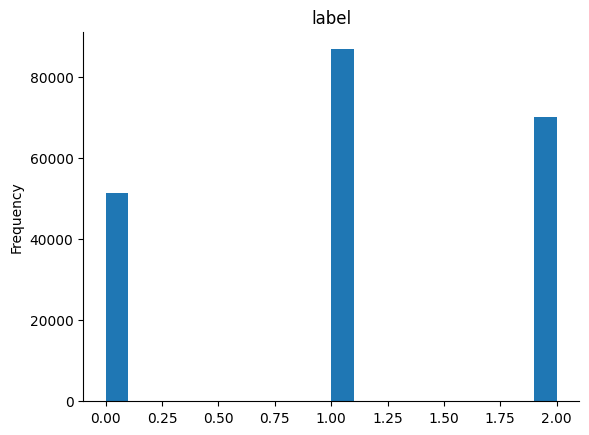

In [ ]:
from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

Leyendo el dataset

In [ ]:
# import pandas as pd
# path_file='Rest-Mex_2025_train.csv'

# df = pd.read_csv(path_file)
# print('tamaño del dataset:', df.shape)

# df.head()

tamaño del dataset: (208051, 6)


,Title,Review,Polarity,Town,Region,Type
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel
3,un buen panorama cerca de CancÃºn,"Estando en CancÃºn, fuimos al puerto y tomamos...",4.0,Isla_Mujeres,QuintanaRoo,Attractive
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,5.0,Patzcuaro,Michoacan,Hotel


El dataset es multilingüe, vamos a quedarnos únicamente con los textos en inglés:

In [ ]:
# df_train=df_train[df_train['language']=='en']
# df_test=df_test[df_test['language']=='en']
# print('tamaño training:', df_train.shape)
# print('tamaño test:', df_test.shape)
train_df.head()

,Title,Review,Polarity,Town,Region,Type,text,label
27504,JAMAS VOLVERÉ NUNCA LO RECOMIENDO,"meseros déspotas, mal servicio, carísimo para ...",1.0,Tlaquepaque,Jalisco,Restaurant,JAMAS VOLVERÉ NUNCA LO RECOMIENDO. meseros dés...,1
8092,Mejor lugar de puesta,Tienen un pequeÃ±o bar con mesas en la playa p...,5.0,Isla_Mujeres,QuintanaRoo,Attractive,Mejor lugar de puesta. Tienen un pequeÃ±o bar ...,2
197104,PRIMERA VISITA A TULUM,Primero lo primero....la atencion recibida des...,5.0,Tulum,QuintanaRoo,Hotel,PRIMERA VISITA A TULUM. Primero lo primero.......,0
33648,baile de salsa y buena comida.,Fuimos con un grupo grande de mis estudiantes ...,4.0,Sayulita,Nayarit,Restaurant,baile de salsa y buena comida.. Fuimos con un ...,1
27568,Desayuno cumpleañeras,Excelente servicio de Arturo Valencia. Muy bue...,5.0,Atlixco,Puebla,Restaurant,Desayuno cumpleañeras. Excelente servicio de A...,1


La competición EXIST 2021 proponía dos tareas: la clasificación binaria de los comenarios (sexistas y no sexistas) y una multiclasificación de los mensajes sexistas en distintos tipos. En este problema nos centramos en la tarea binaria. Las etiquetas de esta tarea están almacenadas en el campo **task1**. En realidad, únicamente vamos a uilizar los campos **task1** y **task1**. Podemos eliminar el resto de los campos:

In [ ]:
df_train = train_df.drop(['Title', 'Review', 'Polarity', 'Town', 'Region', 'Type'], axis=1)
df_test = test_df.drop(['Title', 'Review', 'Polarity', 'Town', 'Region', 'Type'], axis=1)
# mostramos los primeros registros del training
df_train.head()

,text,label
27504,JAMAS VOLVERÉ NUNCA LO RECOMIENDO. meseros dés...,1
8092,Mejor lugar de puesta. Tienen un pequeÃ±o bar ...,2
197104,PRIMERA VISITA A TULUM. Primero lo primero.......,0
33648,baile de salsa y buena comida.. Fuimos con un ...,1
27568,Desayuno cumpleañeras. Excelente servicio de A...,1


### Preprocesamiento

Los textos deben ser transformados a un formato entendible por un algoritmo de aprendizaje automático.

También vamos a aplicaremos algunas tareas básicas de PLN para limpiar y normalizar el texto:

- tokenización
- transformar a minúsculas
- eliminar stopwords
- aplicar stemming sobre cada token, para obtener su raíz.
- eliminar cualquier palabra que contenga algún dígito o signo de puntuación.




In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
stopwords_es = stopwords.words('spanish')

from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re


def clean_text(text):
    # transformar a minúscula
    text=str(text).lower()
    # tokenizar
    tokens=word_tokenize(text, "spanish")
    # borrar stopwords
    tokens = [word for word in tokens if word not in stopwords_es]
    # usar los stems
    tokens = [PorterStemmer().stem(word) for word in tokens]
    # eliminamos las palabras con menos de 3 caráceres
    min_length = 3
    # ignoramos cualquier palabra que contenga un digito o un símbolo especial
    p = re.compile('^[a-zA-Z]+$');

    filtered_tokens=[]
    for token in tokens:
        if len(token)>=min_length and p.match(token):
            filtered_tokens.append(token)

    return filtered_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### Label encoding

Esta tarea consiste en transformar las labels de formato a texto a un formato numérico.


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

y_train = df_train['label'].tolist()
y_test = df_test['label'].tolist()

x_train = df['Type'].tolist()
x_test = df['Type'].tolist()

le = LabelEncoder()

print("antes de transform: ", x_train[:10])
x_train = le.fit_transform(x_train)
LABELS = le.classes_
NUM_LABELS = len(LABELS)

print("antes de transform: ", x_test[:10])
x_test = le.transform(x_test)
print("después de transform:", x_test[:10])

idx2label={}
label2idx={}
for index, label in enumerate(LABELS):
    label2idx.update([(label, index)])
    idx2label.update([(index, label)])
#y_train_cat = to_categorical(y_train)
#y_test_cat = to_categorical(y_test)
print('Labels:', label2idx)

y_train = df_train['label'].tolist()
y_test = df_test['label'].tolist()

antes de transform:  ['Restaurant', 'Attractive', 'Hotel', 'Attractive', 'Hotel', 'Attractive', 'Attractive', 'Hotel', 'Hotel', 'Hotel']
antes de transform:  ['Restaurant', 'Attractive', 'Hotel', 'Attractive', 'Hotel', 'Attractive', 'Attractive', 'Hotel', 'Hotel', 'Hotel']
después de transform: [2 0 1 0 1 0 0 1 1 1]
Labels: {np.str_('Attractive'): 0, np.str_('Hotel'): 1, np.str_('Restaurant'): 2}


## Pipeline (representación de textos + clasificación)


Vamos a crear un pipeline que ejecute los siguientes procesos de forma sencuencial:

1.   Representación de los textos usando el modelo de bolsa de palabras. Para ello usaremos la clase **CountVectorizer** de sklearn. La clase recibe la colección de textos, y devuelve un objeto que contiene su representación en bolsa de palabras. Dentro de dicha clase podemos especificar que usaremos la función **clean_textos** para limipiar los textos.
2.   A partir de la representación de bolsa de palabras, podemos obtener la representación tf-idf. Para ello utilizaremos la clase **TfidfTransformer**, que recibe como entrada la salida del proceso anterior (es decir, el modelo de bolsa de palabras), y produce los vectores tf-idf.
3. Finalmente, el último proceso del pipeline será el algoritmo de clasificación. En este caso, vamos a utilizar una versión de Support Vector Machines, el algoritmo **SVC** proporcionado por la librería sklearn.

Una vez definido, podemos invocar al objeto pipeline para que sea entrenado, recibiendo el conjunto de textos de entrenamiento y sus respectivas etiquetas.
Una vez entrenado, el segundo paso sería

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# definimos un pipeline que primero transforma los textos a BoW
# después los textos se transforma en formato tfidf
# finalmente, se aplica el algoritmo
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('tf', TfidfTransformer()),
    ('svm', SVC()),
])

# totamos los textos
X_train = df_train['text'].tolist()

# entrenamos el pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x7ad6014e9620>)),
                ('tf', TfidfTransformer()), ('svm', SVC())])

## Evaluación

Una vez entrenado, el pipeline puede ser aplicado para inferir la clasificación en los textos del conjunto test.

La comparación de las inferencias del modelo y las labels proporcionadas en el conjunto test (definidas por los anotadores), permite obtener las métricas de precisión, recall y F1. En lugar de implementar esas métricas, ser recomienda utilizar directamente las funciones de sklearn.

In [ ]:
# totamos los textos del conjunto test
X_test= df_test['text'].tolist()
# las labels ya fueron cargadas y transformadas en el apartado de Label encoding.

# usamos el modelo para inferir las predicciones
predictions = pipeline.predict(X_test)


Finalmente, obtenemos los resultados con la función **classification_report**

In [ ]:
from sklearn.metrics import classification_report
print( classification_report(y_test, predictions, target_names=LABELS))


              precision    recall  f1-score   support

  Attractive       0.94      0.78      0.85        77
       Hotel       0.90      0.95      0.93       131
  Restaurant       0.90      0.94      0.92       105

    accuracy                           0.91       313
   macro avg       0.91      0.89      0.90       313
weighted avg       0.91      0.91      0.91       313



La F1 de la clase positiva (sexist) no supera el 71%.

[[ 60  10   7]
 [  2 125   4]
 [  2   4  99]]


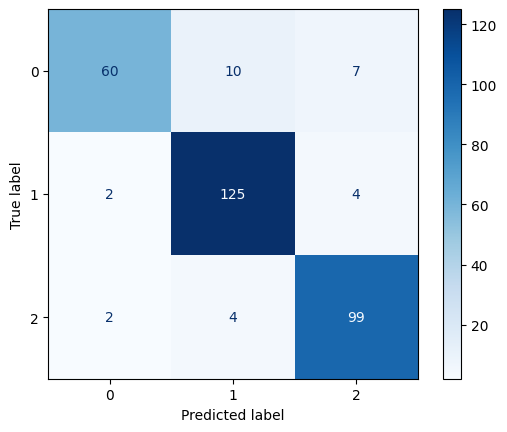

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, predictions))
disp=ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap=plt.cm.Blues)


El modelo clasifica correctamente un alto número de reviews (60 de un total de 77, 125 de un total de 131, y 99 de un total de 105).